<a href="https://colab.research.google.com/github/Kandeo/Lake-Victoria-Rainfall-Analysis/blob/main/Rainfall_in_Lake_Victoria_sub_regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Historic and Projected Rainfall for Lake Victoria Sub-regions**

The [Lake Victoria sub-basin](https://atlas.nilebasin.org/treatise/the-lake-victoria-sub-basin/#) is the area covering the lake surface and the catchment areas of all its tributaries. Lake Victoria is important for agriculture, industry, domestic water supplies, hydropower, fisheries, travel, tourism, and environment. The 3 countries that share the lake shorline are: Kenya (6%), Tanzania (51 %) and Uganda (43%). The average annual precipitation over the sub-basin is estimated as being 1368mm.

This analysis focuses on the historic and projected rainfall across Kagera, Simiyu, Victoria Nile and Lake Victoria Sub-regions.



# **Data Preparation**

Loading Dependencies

In [77]:
#Importing libraries:

#1. Data Wrangling/Manipulation:
import pandas as pd 
import numpy as np 

#2. Data Visualization:
import seaborn as sns   
import matplotlib.pyplot as plt
from matplotlib import rcParams

Loading the Dataset

In [2]:
#Loading the data from the csv to Pandas dataframe:
Rainfall = pd.read_csv('/content/Nile Basin historic-and-projected-rainfall.csv')

#Printing the first 4 rows of the Rainfall dataframe:
Rainfall.head(4)

,Region,Time,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Avg.,Min.,Max.
0,Kagera,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.584,1.646,1.415,0.123,0.211,0.966,0.715
1,Kagera,2001,6.532,0.252,1.093,6.323,4.482,0.254,0.092,0.088,0.720,0.524,2.974,4.383,2.310,0.088,6.532
2,Kagera,2002,1.805,0.130,3.157,6.455,1.155,0.020,0.045,1.060,1.034,3.320,2.322,0.375,1.740,0.020,6.455
3,Kagera,2003,7.727,0.207,2.288,4.336,9.235,2.262,0.190,0.234,1.375,1.329,5.169,1.980,3.028,0.190,9.235


In [3]:
#Checking the number of rows and columns:
Rainfall.shape

(144, 17)

The dataset has 144 rows and 17 columns

Irrelevant Observations

In [4]:
#Dropping the last 3 columns of the dataset since they are part of descriptive summaries:
Rainfall.drop(Rainfall.columns[[14, 15, 16]], axis=1, inplace = True)
Rainfall.head(4)

,Region,Time,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Kagera,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.584,1.646,1.415,0.123
1,Kagera,2001,6.532,0.252,1.093,6.323,4.482,0.254,0.092,0.088,0.720,0.524,2.974,4.383
2,Kagera,2002,1.805,0.130,3.157,6.455,1.155,0.020,0.045,1.060,1.034,3.320,2.322,0.375
3,Kagera,2003,7.727,0.207,2.288,4.336,9.235,2.262,0.190,0.234,1.375,1.329,5.169,1.980


Missing Values

In [5]:
#Checking for null entries in each column:
Rainfall.isnull().sum().sort_values(ascending = False)

Aug       4
July      4
June      4
May       4
April     4
March     4
Feb       4
Jan       4
Dec       0
Nov       0
Oct       0
Sept      0
Time      0
Region    0
dtype: int64

In [6]:
#In as much as few entries have missing values, to avoid losing any observation, 
#the missing values shall be inputed with their respective means.

#Creating a dataframe containing columns with missing values:
Missing = Rainfall[['Aug','July', 'June', 'May', 'April', 'March', 'Feb', 'Jan']].copy()

#Replacing the Missing values with the respective Means:'
for i in Missing:
  Rainfall[i] = Rainfall[i].fillna(Rainfall[i].mean())

Duplicate Values

In [7]:
#Checking for duplicates:
Rainfall.duplicated().sum()    

0

# **Exploratory Data Analysis**

This analysis involves summarizing important characteristics and trends in the data to gain better understanding.

From the historic and projected rainfall data, this analysis seeks to find:

 - Rainfall Distribution over the Months

In [12]:
#Creating a dataframe of the Months:
Total = Rainfall[['Jan','Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']].copy()

#Previewing the first 4 rows:
Total.head(4)


,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,2.414143,2.408057,3.535914,5.156879,5.48365,1.979221,1.017064,1.906993,3.584,1.646,1.415,0.123
1,6.532000,0.252000,1.093000,6.323000,4.48200,0.254000,0.092000,0.088000,0.720,0.524,2.974,4.383
2,1.805000,0.130000,3.157000,6.455000,1.15500,0.020000,0.045000,1.060000,1.034,3.320,2.322,0.375
3,7.727000,0.207000,2.288000,4.336000,9.23500,2.262000,0.190000,0.234000,1.375,1.329,5.169,1.980


In [16]:
#Finding the total rainfall across the 12 months:
Months_Total = Total.sum(axis = 0).sort_values(ascending = False)
Months_Total

May      789.645600
April    742.590514
Nov      577.599000
Oct      545.944000
March    509.171657
Sept     421.803000
Dec      419.817000
Jan      347.636571
Feb      346.760229
June     285.007886
Aug      274.606971
July     146.457257
dtype: float64

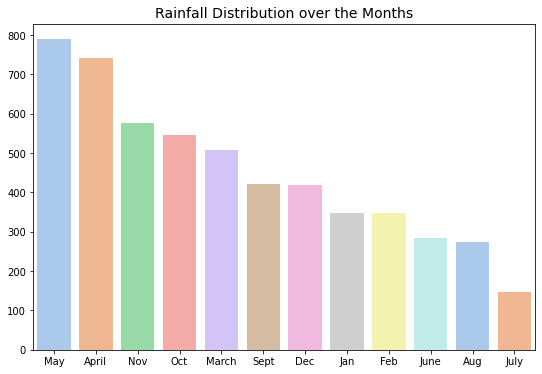

In [21]:
#Visualizing the Information above:
plt.figure(figsize= (9,6))
fontsize = 14
plt.title("Rainfall Distribution over the Months", fontsize = fontsize)
sns.barplot(x=Months_Total.index, y=Months_Total, palette='pastel');

From the plot above, the month of May has the highest amount of precipitation levels ~ 789mm

 - Descriptive Summary

In [54]:
#A descriptive summary of the numerical variables:
Rainfall.describe()

,Time,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,2017.500000,2.414143,2.408057,3.535914,5.156879,5.483650,1.979221,1.017064,1.906993,2.929188,3.791278,4.011104,2.915396
std,10.424554,3.201304,3.366676,4.016884,4.549203,4.157656,2.819778,1.398552,2.317404,2.738371,3.625635,3.479622,2.757755
min,2000.000000,0.027000,0.029000,0.056000,0.101000,0.105000,0.010000,0.021000,0.031000,0.068000,0.032000,0.064000,0.091000
25%,2008.750000,0.508000,0.268750,0.601250,1.501750,2.255000,0.244750,0.168500,0.277000,0.583500,0.968250,1.410750,0.537750
50%,2017.500000,1.376500,1.223500,1.806000,4.522500,4.495500,0.844500,0.397500,1.110500,2.236500,2.793500,2.953500,2.114500
75%,2026.250000,2.625750,3.363000,4.986250,7.129500,7.848000,2.183000,1.169500,2.429000,4.481750,5.481250,5.446000,4.594250
max,2035.000000,18.836000,21.804000,15.867000,22.771000,18.085000,14.907000,7.281000,11.457000,13.008000,16.645000,15.818000,11.683000


The description above provides information on the average, minimum and maximum depth of rainwater(mm/d) for the respective months across the years.

Information about the [Lake Victoria Sub Basin](https://atlas.nilebasin.org/treatise/the-lake-victoria-sub-basin/#:~:text=Major%20Sub%2DBasins%20of%20the%20Nile,-The%20Lake%20Victoria&text=Other%20rivers%20converging%20into%20Lake,of%20the%20entire%20sub%2Dbasin.) shows that 6 countries share the basin. Namely: Burundi, DRC, Kenya, Rwanda, Tanzania and Uganda making most of the East Africa countries.

[East Africa](https://icpac.medium.com/seasonal-forecast-for-east-africa-a-drier-than-usual-season-worries-experts-a4781c6a7a73#:~:text=East%20Africa%20has%20two%20rainy,very%20much%20on%20this%20rainfall.) is known to have 2 rainy seasons: Long rains(March-May) and Short rains(October to December)

 - To validate the above from the descriptive summary:
  -  The Periods between March, April and May have the highest average precipitations of 3.5mm, 5.2mm and a peak of 5.5mm in May respectively. This makes the long rains season.
 
  -  October, November and December have 3.8mm, 4.0mm, and 2.7mm respectively. This periods are known for short rains.


  - Rainfall distribution per Sub-Regions

In [42]:
#Creating a dataframe of the Regions and Months:
Regions_Total = Rainfall[['Region', 'Jan','Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']].copy()


#Adding a column indicating the totals across the rows:
Regions_Total['Total'] = Regions_Total.sum(axis = 1).sort_values(ascending = False)

#Previewing the data:
Regions_Total.head(4)

,Region,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,Kagera,2.414143,2.408057,3.535914,5.156879,5.48365,1.979221,1.017064,1.906993,3.584,1.646,1.415,0.123,30.669921
1,Kagera,6.532000,0.252000,1.093000,6.323000,4.48200,0.254000,0.092000,0.088000,0.720,0.524,2.974,4.383,27.717000
2,Kagera,1.805000,0.130000,3.157000,6.455000,1.15500,0.020000,0.045000,1.060000,1.034,3.320,2.322,0.375,20.878000
3,Kagera,7.727000,0.207000,2.288000,4.336000,9.23500,2.262000,0.190000,0.234000,1.375,1.329,5.169,1.980,36.332000


In [44]:
#To find out which sub-region had the most annual rainfall:
Reg = Regions_Total.groupby('Region')['Total'].sum().sort_values(ascending=False).round()
Reg

Region
L.Victoria    2040.0
Nile          1281.0
Simiyu        1072.0
Kagera        1014.0
Name: Total, dtype: float64

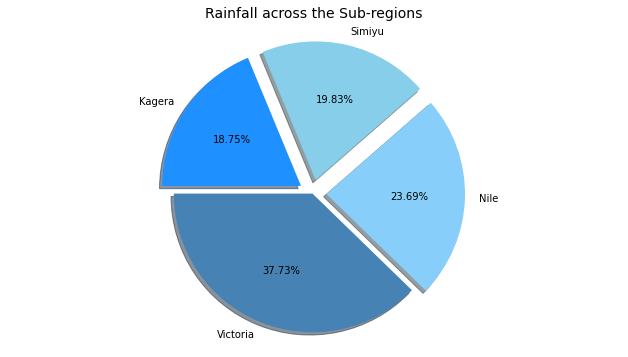

In [53]:
#Visualizing the information on a pie chart:
labels= ['Victoria','Nile', 'Simiyu', 'Kagera']
colors=['steelblue', 'lightskyblue', 'skyblue', 'dodgerblue']
fontsize = 14
plt.figure(figsize= (11, 6))
plt.title("Rainfall across the Sub-regions", fontsize = fontsize)
plt.pie(Reg, labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()



38% of the total rainfall is from the Victoria sub region making it the largest contributor.

 - Annual Precipitation Trend Analysis



In [76]:
#To view which year has the peak annual precipitation:
Rainfall.groupby('Time')['Total'].sum().sort_values(ascending = False). head(4)


Time
2026    382.072
2027    378.566
2028    351.460
2011    346.986
Name: Total, dtype: float64

<function matplotlib.pyplot.show>

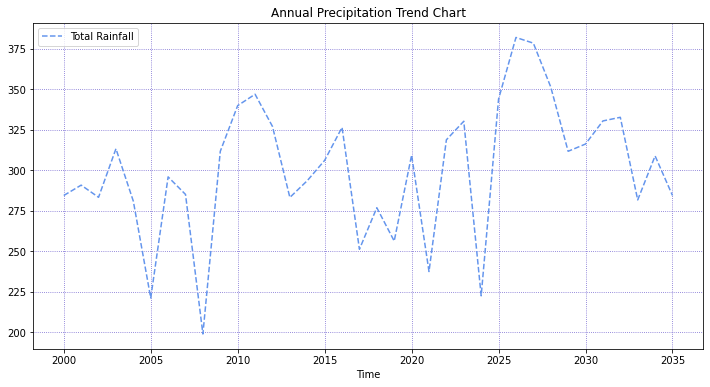

In [99]:
#Visualizing using a trend chart;
Rainfall['Total Rainfall'] = Regions_Total.sum(axis = 1).sort_values()

#Grouping by years:
T = Rainfall.groupby('Time')['Total Rainfall'].sum()
T

#Plotting the trend:
plt.figure(figsize= (12, 6))
T.plot(x = 'Years', y = 'Total Rainfall', kind = 'line', color = 'cornflowerblue', linestyle = 'dashed')
plt.grid(True,  color = 'slateblue', linestyle = ':')
plt.title("Annual Precipitation Trend Chart")
plt.legend(loc = 2)
plt.show

It is anticipated that the annual precipitation will reach a peak in the year 2026 with 383mm